In [8]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monte-Carlo Default Simulation : Short Term Asset

Gaussian copula framework : 
$$ \left[ \begin{array}{c}
obligor_t \\
seller_t
\end{array} \right]  = 

\left[ \begin{array}{cc}
1 & 0 \\
\rho & \sqrt{1-\rho}
\end{array} \right] 

\left[ \begin{array}{c}
\epsilon_{1,t} \\
\epsilon_{2,t}
\end{array} \right] 

\Longrightarrow

\begin{cases}
obligor_t =  \epsilon_{1,t} \\
seller_t = \rho\ obligor_t + \sqrt{1-\rho}\ \epsilon_{2,t}
\end{cases}
$$

In [135]:
def inv_gauss_cumul(alpha,f):
    low = -1
    high = 1
    for i in range(1000):
        mid = (low + high)/2
        if abs(f(mid) - alpha) < 0.000001:
            return mid
        elif f(mid) < alpha:
            low = mid
        else:
            high = mid

inv_gauss_cumul(0.5,norm.cdf)

0.0

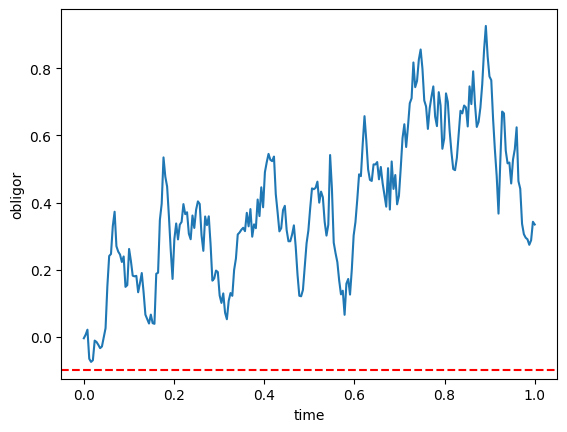

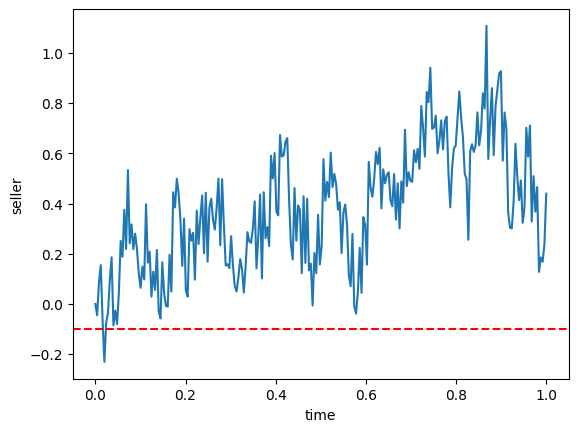

In [242]:
T = 1
N = 250
std = np.sqrt(1/250)
obligor = [0]
obligor = obligor + std*np.random.randn(N)
obligor = np.cumsum(obligor)
X=[]
for i in np.linspace(0,T,N):
    X.append(i)

plt.plot(X, obligor)
plt.xlabel('time')
plt.ylabel('obligor')
plt.axhline(y=-0.1, color='r', linestyle='--')
plt.show()

rho = 0.99
s=-0.1
gauss = np.random.randn(249)
seller = [0]
for i in range(249):
    seller.append(np.sqrt(rho)*obligor[i] + np.sqrt(1 - rho)*gauss[i])

X=[]
for i in np.linspace(0,T,N):
    X.append(i)

plt.plot(X, seller)
plt.xlabel('time')
plt.ylabel('seller')
plt.axhline(y=s, color='r', linestyle='--')
plt.show()

In [243]:
# DEFAUT OBLIGOR
d=0 # Indique si il y a défaut
k=1
i=0
while i != len(obligor):

    while obligor[i] > s:
        i+=1 
        if i==len(obligor):
            break

    if i == len(obligor):
        break
    
    d=1 # On sort de la boucle donc il y a forcément défaut en commençant avec obligor[i] < s
    if 249-i >= 90:
        while k != 90:
            if obligor[i+k] > s:
                d=0
                i = i+k
                break
            k+=1
    i+=1

print('defaut obligor :', d)



defaut obligor : 0


In [244]:
# DEFAUT SELLER
d=0 # Indique si il y a défaut
k=1
i=0
while i != len(seller):

    while obligor[i] > s:
        i+=1 
        if i==len(seller):
            break

    if i == len(seller):
        break
    
    d=1 # On sort de la boucle donc il y a forcément défaut en commençant avec seller[i] < s
    if 249-i >= 90:
        while k != 90:
            if seller[i+k] > s:
                d=0
                i = i+k
                break
            k+=1
    i+=1

print('defaut seller :', d)



defaut seller : 0
